In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pyslha
import glob
from plotting.nloSbottomXsec import xsecF

### Old Scan (Les Houches 2019)

In [7]:
masses_tau = []
lumi = 200.0
nMax = 500000
for f in glob.glob('./slha/*.slha'):
    data = pyslha.readSLHAFile(f)
    msb = data.blocks['MASS'][5000005]
    mn1 = data.blocks['MASS'][5000022]
    wsb = data.decays[5000005].totalwidth
    tau_ns = 6.582e-16/wsb
    xsec = xsecF(msb)
    mcEvents = min(nMax,xsec*1e3*lumi)
    masses_tau.append([mn1,msb,tau_ns,mcEvents])

masses_tau = sorted(masses_tau)
print(len(masses_tau))


58


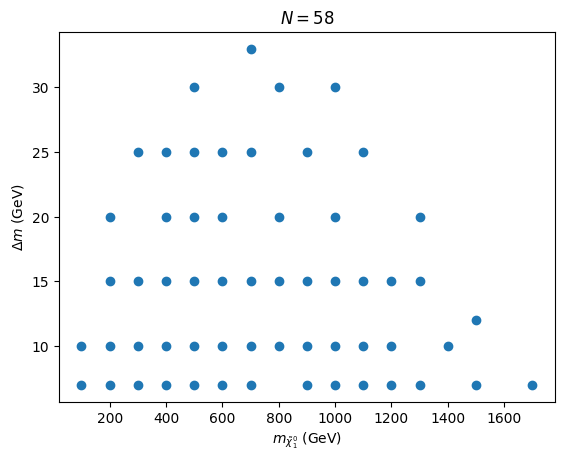

In [8]:
pts = np.array(masses_tau)
mN1 = pts[:,0]
deltaM = pts[:,1]-mN1
plt.scatter(mN1,deltaM)
# plt.xscale('log')
# plt.xlim(1e-3,1e2)
# plt.ylim(25.,2000.)
plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.title(r'$N = %i$' %len(pts))
plt.show()

In [27]:
ptsIni = [("%1.0f" %pt[0], "%1.1f" %pt[1], "%1.1e" %pt[2]) for pt in masses_tau]
print(str(ptsIni).replace("'", ""))

[(100, 107.0, 1.1e+00), (100, 110.0, 7.2e-01), (200, 207.0, 1.3e+00), (200, 210.0, 8.8e-01), (200, 215.0, 3.5e-01), (200, 220.0, 1.1e-01), (300, 307.0, 1.3e+00), (300, 310.0, 8.4e-01), (300, 315.0, 3.6e-01), (300, 325.0, 7.0e-02), (400, 407.0, 1.3e+00), (400, 410.0, 7.9e-01), (400, 415.0, 3.4e-01), (400, 420.0, 1.8e-01), (400, 425.0, 9.9e-02), (500, 507.0, 1.3e+00), (500, 510.0, 7.2e-01), (500, 515.0, 3.1e-01), (500, 520.0, 1.7e-01), (500, 525.0, 1.0e-01), (500, 530.0, 4.8e-02), (600, 607.0, 1.3e+00), (600, 610.0, 6.7e-01), (600, 615.0, 2.9e-01), (600, 620.0, 1.6e-01), (600, 625.0, 9.4e-02), (700, 707.0, 1.3e+00), (700, 710.0, 6.1e-01), (700, 715.0, 2.6e-01), (700, 725.0, 8.5e-02), (700, 733.0, 2.1e-02), (800, 810.0, 5.6e-01), (800, 815.0, 2.3e-01), (800, 820.0, 1.3e-01), (800, 830.0, 4.0e-02), (900, 907.0, 1.2e+00), (900, 910.0, 5.1e-01), (900, 915.0, 2.1e-01), (900, 925.0, 6.4e-02), (1000, 1007.0, 1.1e+00), (1000, 1010.0, 4.6e-01), (1000, 1015.0, 1.8e-01), (1000, 1020.0, 9.6e-02), (1

In [28]:
ptsIni = [("%1.0f" %pt[0], "%1.1f" %pt[1], "%1.1e" %pt[2], "%i" %pt[3]) for pt in masses_tau]
print(str(ptsIni).replace("'", ""))

[(100, 107.0, 1.1e+00, 500000), (100, 110.0, 7.2e-01, 500000), (200, 207.0, 1.3e+00, 500000), (200, 210.0, 8.8e-01, 500000), (200, 215.0, 3.5e-01, 500000), (200, 220.0, 1.1e-01, 500000), (300, 307.0, 1.3e+00, 500000), (300, 310.0, 8.4e-01, 500000), (300, 315.0, 3.6e-01, 500000), (300, 325.0, 7.0e-02, 500000), (400, 407.0, 1.3e+00, 391599), (400, 410.0, 7.9e-01, 376000), (400, 415.0, 3.4e-01, 352000), (400, 420.0, 1.8e-01, 328000), (400, 425.0, 9.9e-02, 308000), (500, 507.0, 1.3e+00, 112440), (500, 510.0, 7.2e-01, 108600), (500, 515.0, 3.1e-01, 102600), (500, 520.0, 1.7e-01, 96800), (500, 525.0, 1.0e-01, 91600), (500, 530.0, 4.8e-02, 86600), (600, 607.0, 1.3e+00, 38280), (600, 610.0, 6.7e-01, 37200), (600, 615.0, 2.9e-01, 35400), (600, 620.0, 1.6e-01, 33600), (600, 625.0, 9.4e-02, 32000), (700, 707.0, 1.3e+00, 14696), (700, 710.0, 6.1e-01, 14300), (700, 715.0, 2.6e-01, 13660), (700, 725.0, 8.5e-02, 12480), (700, 733.0, 2.1e-02, 11628), (800, 810.0, 5.6e-01, 6000), (800, 815.0, 2.3e-01, 

#### Split runs into at most 75k batches

In [29]:
masses_tau_split = []
for pt in masses_tau:
    if pt[3] < 50000:
        continue
    nbatches = pt[3]/75000.
    ntot = 0
    for n in range(int(nbatches)+1):
        nevts = min(75000,pt[3]-ntot)
        if nevts <= 0:
            continue
        ntot += nevts
        masses_tau_split.append([pt[0],pt[1],pt[2],nevts])

In [30]:
ptsIni = [("%1.0f" %pt[0], "%1.1f" %pt[1], "%1.1e" %pt[2], "%i" %pt[3]) for pt in masses_tau_split]
print(str(ptsIni).replace("'", ""))
print(len(masses_tau_split))

[(100, 107.0, 1.1e+00, 75000), (100, 107.0, 1.1e+00, 75000), (100, 107.0, 1.1e+00, 75000), (100, 107.0, 1.1e+00, 75000), (100, 107.0, 1.1e+00, 75000), (100, 107.0, 1.1e+00, 75000), (100, 107.0, 1.1e+00, 50000), (100, 110.0, 7.2e-01, 75000), (100, 110.0, 7.2e-01, 75000), (100, 110.0, 7.2e-01, 75000), (100, 110.0, 7.2e-01, 75000), (100, 110.0, 7.2e-01, 75000), (100, 110.0, 7.2e-01, 75000), (100, 110.0, 7.2e-01, 50000), (200, 207.0, 1.3e+00, 75000), (200, 207.0, 1.3e+00, 75000), (200, 207.0, 1.3e+00, 75000), (200, 207.0, 1.3e+00, 75000), (200, 207.0, 1.3e+00, 75000), (200, 207.0, 1.3e+00, 75000), (200, 207.0, 1.3e+00, 50000), (200, 210.0, 8.8e-01, 75000), (200, 210.0, 8.8e-01, 75000), (200, 210.0, 8.8e-01, 75000), (200, 210.0, 8.8e-01, 75000), (200, 210.0, 8.8e-01, 75000), (200, 210.0, 8.8e-01, 75000), (200, 210.0, 8.8e-01, 50000), (200, 215.0, 3.5e-01, 75000), (200, 215.0, 3.5e-01, 75000), (200, 215.0, 3.5e-01, 75000), (200, 215.0, 3.5e-01, 75000), (200, 215.0, 3.5e-01, 75000), (200, 215

### New Scan

In [5]:
data = np.genfromtxt('./CDFOdata_2112_01499v3_Fig9.dat',skip_header=7)

In [6]:
masses_tauNew = []
lumi = 200.0
nMax = 500000
for pt in data:
    msb = pt[2]
    mn1 = pt[0]
    tau_ns = 1e9*pt[4]/3e8
    xsec = xsecF(msb)
    mcEvents = min(nMax,xsec*1e3*lumi)
    masses_tauNew.append([mn1,msb,tau_ns,mcEvents])

masses_tauNew = sorted(masses_tauNew)
print(len(masses_tauNew))


438


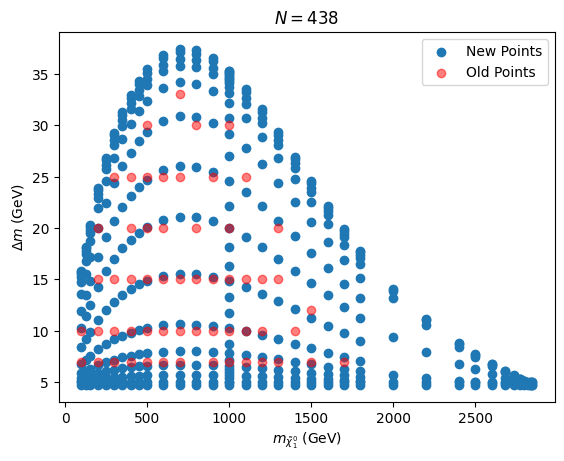

In [12]:
ptsNew = np.array(masses_tauNew)
mN1 = ptsNew[:,0]
deltaM = ptsNew[:,1]-mN1
plt.scatter(mN1,deltaM,label='New Points')
plt.scatter(pts[:,0],pts[:,1]-pts[:,0],c='red',label='Old Points',alpha=0.5)
plt.legend()
# plt.xscale('log')
# plt.xlim(1e-3,1e2)
# plt.ylim(25.,2000.)
plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.title(r'$N = %i$' %len(ptsNew))
plt.show()

In [13]:
ptsNewLight = ptsNew[ptsNew[:,1] < 1000.]
print(len(ptsNewLight))

210


In [19]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in ptsNewLight]
print(str(ptsIni).replace("'", ""))

[(100.00, 104.75, 5.66e+00), (100.00, 105.00, 3.98e+00), (100.00, 105.08, 3.75e+00), (100.00, 105.41, 3.09e+00), (100.00, 105.86, 2.52e+00), (100.00, 106.74, 1.79e+00), (100.00, 108.40, 1.05e+00), (100.00, 110.28, 6.00e-01), (100.00, 111.94, 3.49e-01), (100.00, 113.61, 1.77e-01), (100.00, 114.71, 9.01e-02), (100.00, 115.27, 5.15e-02), (100.00, 115.49, 3.64e-02), (100.00, 115.71, 2.15e-02), (100.00, 115.82, 1.40e-02), (125.00, 129.75, 6.10e+00), (125.00, 130.00, 4.11e+00), (125.00, 130.15, 3.68e+00), (125.00, 130.56, 2.94e+00), (125.00, 131.09, 2.32e+00), (125.00, 132.17, 1.57e+00), (125.00, 134.18, 8.78e-01), (125.00, 136.46, 4.97e-01), (125.00, 138.48, 2.92e-01), (125.00, 140.49, 1.49e-01), (125.00, 141.83, 7.63e-02), (125.00, 142.50, 4.30e-02), (125.00, 142.77, 2.99e-02), (125.00, 143.04, 1.68e-02), (125.00, 143.18, 1.02e-02), (150.00, 154.75, 6.50e+00), (150.00, 155.00, 4.23e+00), (150.00, 155.22, 3.60e+00), (150.00, 155.68, 2.80e+00), (150.00, 156.30, 2.15e+00), (150.00, 157.54, 1.